In [16]:
import pandas as pd
import cPickle as pkl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [87]:
transcript_file = '../../data/FISH_RNAseq_combined_FACS_phases_7_genes.xlsx'

In [88]:
transcript_data = pd.read_excel(transcript_file, sheetname='nostress_WT_R1_rounded', 
                                skiprows=1, skipfooter=2, parse_cols='A, D:P')

In [89]:
transcript_data.head()

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60
0,YAL001C,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0
1,YAL002W,1.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0
2,YAL003W,17.0,13.0,48.0,51.0,51.0,100.0,100.0,104.0,27.0,47.0,23.0,46.0,31.0
3,YAL004W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,YAL005C,25.0,23.0,62.0,47.0,50.0,83.0,93.0,99.0,41.0,34.0,26.0,46.0,30.0


In [108]:
genes_shortlist = {'HHF1': 'YBR009C', 'HHF2': 'YNL030W', 'HHT1': 'YBR010W', 'HHT2': 'YNL031C', 'HTB1': 'YDR224C', 
                   'HTB2': 'YBL002W', 'PMA1': 'YGL008C', 
                   'RNR1': 'YER070W', 'RNR2': 'YJL026W', 
                   #'RNR3': 'YIL066C', 
                   'RNR4': 'YGR180C', 
                   # genes suggested by Katja, some histones
                   #'SIC1': 'YLR079W', 
                   'CLN2': 'YPL256C', 
                   #'CLB2': 'YPR119W', 
                   #'CLB5': 'YPR120C', 
                   'PCL1': 'YNL289W', 
                   #'PCL9': 'YDL179W', 
                   #'SWE1': 'YJL187C'
                  } # FISH genes

In [109]:
selected_transcript_data = transcript_data[transcript_data['Gene'].isin(genes_shortlist.values())]

In [110]:
selected_transcript_data = selected_transcript_data.set_index('Gene')

In [111]:
selected_transcript_data

,0,5,10,15,20,25,30,35,40,45,50,55,60
Gene,,,,,,,,,,,,,
YBL002W,2.0,4.0,27.0,58.0,77.0,113.0,75.0,44.0,12.0,7.0,4.0,6.0,4.0
YBR009C,2.0,1.0,10.0,55.0,106.0,152.0,91.0,47.0,8.0,6.0,2.0,6.0,3.0
YBR010W,2.0,2.0,12.0,42.0,70.0,81.0,40.0,23.0,4.0,3.0,2.0,3.0,2.0
YDR224C,3.0,5.0,18.0,41.0,65.0,68.0,48.0,28.0,8.0,4.0,2.0,5.0,3.0
YER070W,2.0,11.0,46.0,29.0,14.0,12.0,6.0,5.0,1.0,2.0,2.0,3.0,6.0
YGL008C,3.0,4.0,10.0,6.0,11.0,24.0,22.0,28.0,8.0,12.0,7.0,15.0,8.0
YGR180C,6.0,6.0,15.0,15.0,19.0,17.0,29.0,23.0,8.0,10.0,4.0,9.0,5.0
YJL026W,4.0,5.0,16.0,18.0,16.0,30.0,29.0,27.0,10.0,9.0,4.0,6.0,6.0
YNL030W,6.0,7.0,50.0,77.0,107.0,152.0,81.0,46.0,15.0,9.0,6.0,8.0,10.0


To find the rows that do not plot well because of low counts:

In [112]:
selected_transcript_data.max(axis=1)

Gene
YBL002W    113.0
YBR009C    152.0
YBR010W     81.0
YDR224C     68.0
YER070W     46.0
YGL008C     28.0
YGR180C     29.0
YJL026W     30.0
YNL030W    152.0
YNL031C    232.0
YNL289W     17.0
YPL256C     18.0
dtype: float64

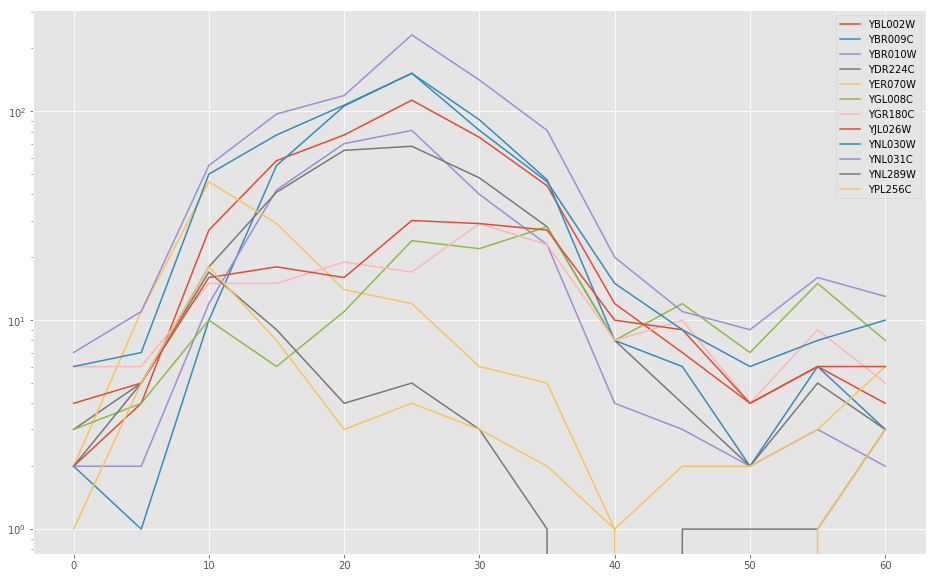

In [113]:
plt.rcParams['figure.figsize'] = (16, 10)

fig, ax = plt.subplots()

for gene in selected_transcript_data.index:
    #print gene
    #print selected_transcript_data.loc[gene]
    ax.plot(selected_transcript_data.loc[gene], label=gene)
    ax.set_yscale('log')
    plt.legend(loc='upper right')